<a href="https://colab.research.google.com/github/rwtsgr/project1/blob/main/video_classification_and_prediction_interrogative_words_ISL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#@title
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import os

path = '/content/drive/MyDrive/dataset/train'

dataset_path = os.listdir(path)

label_types = os.listdir(path)
print (label_types)



['When(days)', 'Why', 'Who', 'Where', 'How much', 'How many', 'What', 'Which', 'whose', 'When(time)']


In [ ]:
# Get Names of all classes in UCF50
all_classes_names = os.listdir('/content/drive/MyDrive/dataset/train')
all_classes_names

['When(days)',
 'Why',
 'Who',
 'Where',
 'How much',
 'How many',
 'What',
 'Which',
 'whose',
 'When(time)']

In [ ]:
#@title
import random
import tensorflow as tf
import cv2
from sklearn.model_selection import train_test_split

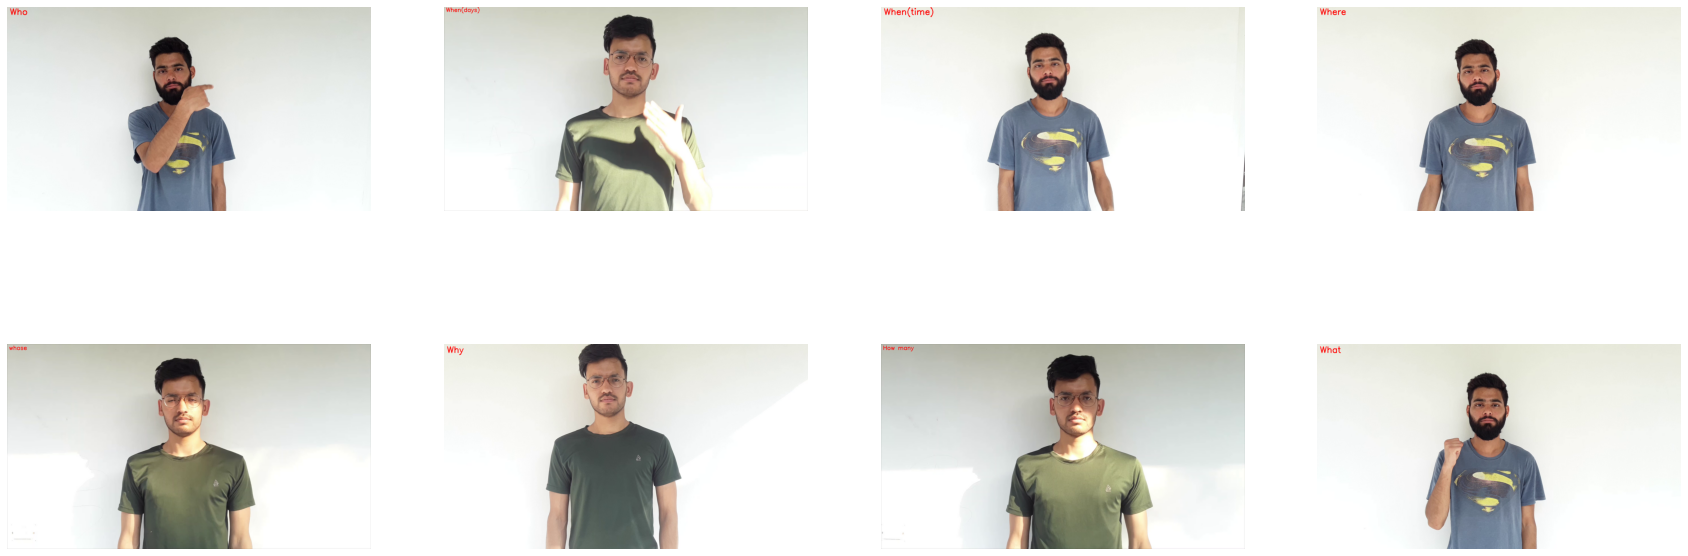

In [ ]:
plt.figure(figsize = (30, 30))

# Get Names of all classes in UCF50
all_classes_names = os.listdir('/content/drive/MyDrive/dataset/train')

# Generate a random sample of images each time the cell runs
random_range = random.sample(range(len(all_classes_names)), 1)

# Iterating through all the random samples
for counter, random_index in enumerate(random_range, 1):

    # Getting Class Name using Random Index
    selected_class_Name = all_classes_names[random_index]

    # Getting a list of all the video files present in a Class Directory
    video_files_names_list = os.listdir(f'/content/drive/MyDrive/dataset/train/{selected_class_Name}')

    # Randomly selecting a video file
    selected_video_file_name = random.choice(video_files_names_list)

    # Reading the Video File Using the Video Capture
    video_reader = cv2.VideoCapture(f'/content/drive/MyDrive/dataset/train/{selected_class_Name}/{selected_video_file_name}')
    
    # Reading The First Frame of the Video File
    _, bgr_frame = video_reader.read()

    # Closing the VideoCapture object and releasing all resources. 
    video_reader.release()

    # Converting the BGR Frame to RGB Frame 
    rgb_frame = cv2.cvtColor(bgr_frame, cv2.COLOR_BGR2RGB)

    # Adding The Class Name Text on top of the Video Frame.
    cv2.putText(rgb_frame, selected_class_Name, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2)
    
    # Assigning the Frame to a specific position of a subplot
    plt.subplot(5, 4, counter)
    plt.imshow(rgb_frame)
    plt.axis('off')

In [ ]:
classes_list = ['When(days)', 'Why', 'Who', 'Where', 'How much', 'How many', 'What', 'Which', 'whose', 'When(time)']

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout 




image_height, image_width = 64, 64
max_images_per_class = 500
model_output_size = len(classes_list)
dataset_directory = "/content/drive/MyDrive/dataset/train"



def create_model():

 

    # We will use a Sequential model for model construction


    Model = Sequential()
    Model.add(Conv2D(64,3,padding="same", activation="relu", input_shape=(image_height, image_width, 3)))
    Model.add(MaxPool2D())

    Model.add(Conv2D(64, 3, padding="same", activation="relu"))
    Model.add(MaxPool2D())

    Model.add(Conv2D(64, 3, padding="same", activation="relu"))
    Model.add(MaxPool2D())
    Model.add(Dropout(0.4))

    Model.add(Flatten())
    Model.add(Dense(256,activation="relu"))
    Model.add(Dense(model_output_size, activation="softmax"))

 

    # Printing the models summary

    Model.summary()

 

    return Model

# Calling the create_model method
Model = create_model()
print("Model Created Successfully!")

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 64)        1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 8, 8, 64)         0

In [ ]:
seed_constant = 23
np.random.seed(seed_constant)
random.seed(seed_constant)
tf.random.set_seed(seed_constant)


In [ ]:
def frames_extraction(video_path):
    # Empty List declared to store video frames
    frames_list = []
    
    # Reading the Video File Using the VideoCapture
    video_reader = cv2.VideoCapture(video_path)

    # Iterating through Video Frames
    while True:

        # Reading a frame from the video file 
        success, frame = video_reader.read() 

        # If Video frame was not successfully read then break the loop
        if not success:
            break

        # Resize the Frame to fixed Dimensions
        resized_frame = cv2.resize(frame, (image_height, image_width))
        
        # Normalize the resized frame by dividing it with 255 so that each pixel value then lies between 0 and 1
        normalized_frame = resized_frame / 255
        
        # Appending the normalized frame into the frames list
        frames_list.append(normalized_frame)
    
    # Closing the VideoCapture object and releasing all resources. 
    video_reader.release()

    # returning the frames list 
    return frames_list


def create_dataset():

    # Declaring Empty Lists to store the features and labels values.
    temp_features = [] 
    features = []
    labels = []
    
    # Iterating through all the classes mentioned in the classes list
    for class_index, class_name in enumerate(classes_list):
        print(f'Extracting Data of Class: {class_name}')
        
        # Getting the list of video files present in the specific class name directory
        files_list = os.listdir(os.path.join(dataset_directory, class_name))

        # Iterating through all the files present in the files list
        for file_name in files_list:

            # Construct the complete video path
            video_file_path = os.path.join(dataset_directory, class_name, file_name)

            # Calling the frame_extraction method for every video file path
            frames = frames_extraction(video_file_path)

            # Appending the frames to a temporary list.
            temp_features.extend(frames)
        
        # Adding randomly selected frames to the features list
        features.extend(random.sample(temp_features, max_images_per_class))

        # Adding Fixed number of labels to the labels list
        labels.extend([class_index] * max_images_per_class)
        
        # Emptying the temp_features list so it can be reused to store all frames of the next class.
        temp_features.clear()

    # Converting the features and labels lists to numpy arrays
    features = np.asarray(features)
    labels = np.array(labels)  

    return features, labels

In [ ]:
features, labels = create_dataset()

Extracting Data of Class: When(days)
Extracting Data of Class: Why
Extracting Data of Class: Who
Extracting Data of Class: Where
Extracting Data of Class: How much
Extracting Data of Class: How many
Extracting Data of Class: What
Extracting Data of Class: Which
Extracting Data of Class: whose
Extracting Data of Class: When(time)


In [ ]:
from sklearn.model_selection import train_test_split
features_train, features_test, labels_train, labels_test = train_test_split(features, labels, test_size = 0.2, shuffle = True, random_state = seed_constant)

In [ ]:
import argparse
ap = argparse.ArgumentParser()
ap.add_argument("-e", "--epochs", type=int, default=25,
	help="# of epochs to train our network for")

_StoreAction(option_strings=['-e', '--epochs'], dest='epochs', nargs=None, const=None, default=25, type=<class 'int'>, choices=None, help='# of epochs to train our network for', metavar=None)

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

# Adding Early Stopping Callback
early_stopping_callback = EarlyStopping(monitor = 'val_loss', patience = 15, mode = 'min', restore_best_weights = True)

# Adding loss, optimizer and metrics values to the model.
Model.compile(optimizer='adam',loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])


# Start Training
model_training_history = Model.fit(x = features_train, y = labels_train, epochs = 10, batch_size = 4 , shuffle = True, validation_split = 0.1, callbacks = [early_stopping_callback])

Epoch 1/10


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


900/900 [==============================] - 56s 61ms/step - loss: 1.1101 - accuracy: 0.6042 - val_loss: 0.2872 - val_accuracy: 0.9150
Epoch 2/10
900/900 [==============================] - 54s 60ms/step - loss: 0.2569 - accuracy: 0.9167 - val_loss: 0.0932 - val_accuracy: 0.9700
Epoch 3/10
900/900 [==============================] - 55s 61ms/step - loss: 0.1309 - accuracy: 0.9556 - val_loss: 0.0891 - val_accuracy: 0.9700
Epoch 4/10
900/900 [==============================] - 53s 59ms/step - loss: 0.1046 - accuracy: 0.9667 - val_loss: 0.0659 - val_accuracy: 0.9800
Epoch 5/10
900/900 [==============================] - 52s 58ms/step - loss: 0.0805 - accuracy: 0.9750 - val_loss: 0.1241 - val_accuracy: 0.9575
Epoch 6/10
900/900 [==============================] - 52s 58ms/step - loss: 0.0537 - accuracy: 0.9814 - val_loss: 0.0316 - val_accuracy: 0.9850
Epoch 7/10
900/900 [==============================] - 54s 61ms/step - loss: 0.0642 - accuracy: 0.9794 - val_loss: 0.0423 - val_accuracy: 0.9850
Epo

In [ ]:
model_evaluation_history = Model.evaluate(features_test, labels_test)

 1/32 [..............................] - ETA: 6s - loss: 0.0123 - accuracy: 1.0000

/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


32/32 [==============================] - 3s 82ms/step - loss: 0.0165 - accuracy: 0.9960


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:30: MatplotlibDeprecationWarning: Unrecognized location 'middle right'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.


<Figure size 2160x2160 with 0 Axes>

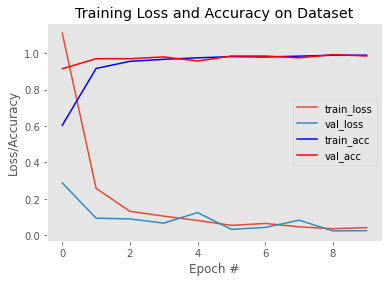

In [ ]:
# evaluate the network
#print("[INFO] evaluating network...")

#y_pred=Model.predict(features_test)
#y_pred=np.argmax(y_pred, axis=1)
#labels_test=np.argmax(labels_test, axis=1)


#predictions = Model.predict(x=testX.astype("float32"), batch_size=32)
#print(classification_report(testY.argmax(axis=1),
#	predictions.argmax(axis=1), target_names=lb.classes_))

#predictions = Model.predict(features_test)
#predictions=np.argmax(predictions, axis=1)
#labels_test=np.argmax(labels_test, axis=1)

# plot the training loss and accuracy

plt.figure(figsize = (30, 30))
N = 10
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), model_training_history.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), model_training_history.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), model_training_history.history["accuracy"], 'blue' ,label="train_acc")
plt.plot(np.arange(0, N), model_training_history.history["val_accuracy"], 'red', label="val_acc")
plt.title("Training Loss and Accuracy on Dataset")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="middle right")
plt.grid(False)
plt.savefig('plot(adam).png', dpi = 300)
#plt.savefig(args["plot"])

In [ ]:
def plot_metric(metric_name_1, metric_name_2, plot_name):
  # Get Metric values using metric names as identifiers
  metric_value_1 = model_training_history.history[metric_name_1]
  metric_value_2 = model_training_history.history[metric_name_2]

  # Constructing a range object which will be used as time 
  epochs = range(len(metric_value_1))
  
  # Plotting the Graph
  plt.plot(epochs, metric_value_1, 'blue', label = metric_name_1)
  plt.plot(epochs, metric_value_2, 'red', label = metric_name_2)
  
  # Adding title to the plot
  plt.title(str(plot_name))

  # Adding legend to the plot
  plt.legend()

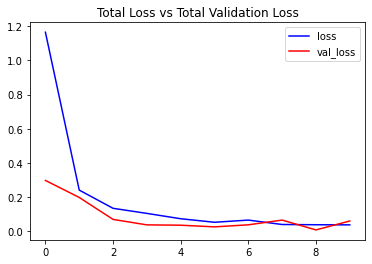

In [ ]:
plot_metric('loss', 'val_loss', 'Total Loss vs Total Validation Loss')

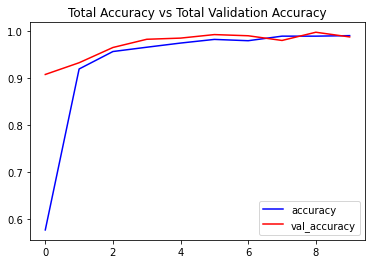

In [ ]:
plot_metric('accuracy', 'val_accuracy', 'Total Accuracy vs Total Validation Accuracy')

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout 




image_height, image_width = 64, 64
max_images_per_class = 500
model_output_size = len(classes_list)
dataset_directory = "/content/drive/MyDrive/dataset/train"



def create_model():

 

    # We will use a Sequential model for model construction


    model = Sequential()
    model.add(Conv2D(64,3,padding="same", activation="relu", input_shape=(image_height, image_width, 3)))
    model.add(MaxPool2D())

    model.add(Conv2D(64, 3, padding="same", activation="relu"))
    model.add(MaxPool2D())

    model.add(Conv2D(64, 3, padding="same", activation="relu"))
    model.add(MaxPool2D())
    model.add(Dropout(0.4))

    model.add(Flatten())
    model.add(Dense(256,activation="relu"))
    model.add(Dense(model_output_size, activation="softmax"))

 

    # Printing the models summary

    model.summary()

 

    return model

# Calling the create_model method
model = create_model()
print("model Created Successfully!")

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 64, 64, 64)        1792      
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 32, 32, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_19 (Conv2D)          (None, 32, 32, 64)        36928     
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 16, 16, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_20 (Conv2D)          (None, 16, 16, 64)        36928     
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 8, 8, 64)        

In [ ]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs = {}):
        if logs.get("loss") < 0.004:
            print("\nReached 99.6% accuracy so cancelling training!")
            self.model.stop_training = True

callback = myCallback()

In [ ]:
from tensorflow.keras.optimizers import RMSprop

model.compile(
    optimizer = RMSprop(learning_rate = 0.001),
    loss = "sparse_categorical_crossentropy",
    metrics = ["accuracy"]
)
model_training_history = model.fit(x = features_train, y = labels_train, epochs = 10, batch_size = 4 , shuffle = True, validation_split = 0.1, callbacks = [callback])

Epoch 1/10
900/900 [==============================] - 64s 70ms/step - loss: 1.0110 - accuracy: 0.6472 - val_loss: 0.2240 - val_accuracy: 0.9250
Epoch 2/10
900/900 [==============================] - 63s 70ms/step - loss: 0.2390 - accuracy: 0.9214 - val_loss: 0.0960 - val_accuracy: 0.9700
Epoch 3/10
900/900 [==============================] - 62s 69ms/step - loss: 0.1624 - accuracy: 0.9494 - val_loss: 0.0383 - val_accuracy: 0.9900
Epoch 4/10
900/900 [==============================] - 62s 69ms/step - loss: 0.1212 - accuracy: 0.9647 - val_loss: 0.0607 - val_accuracy: 0.9825
Epoch 5/10
900/900 [==============================] - 61s 68ms/step - loss: 0.0984 - accuracy: 0.9736 - val_loss: 0.1483 - val_accuracy: 0.9600
Epoch 6/10
900/900 [==============================] - 61s 68ms/step - loss: 0.0942 - accuracy: 0.9761 - val_loss: 0.0525 - val_accuracy: 0.9825
Epoch 7/10
900/900 [==============================] - 63s 70ms/step - loss: 0.1005 - accuracy: 0.9758 - val_loss: 0.1013 - val_accuracy:

In [ ]:
model_evaluation_history = model.evaluate(features_test, labels_test)

32/32 [==============================] - 3s 94ms/step - loss: 0.0723 - accuracy: 0.9800


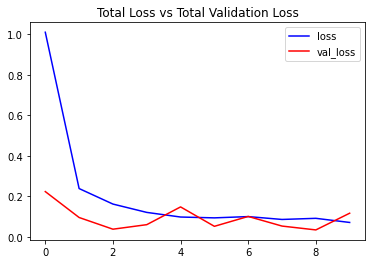

In [ ]:
plot_metric('loss', 'val_loss', 'Total Loss vs Total Validation Loss')

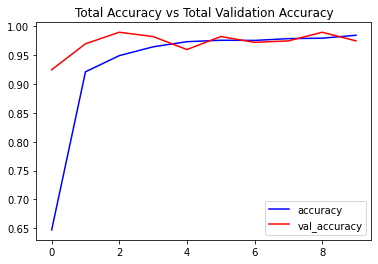

In [ ]:
plot_metric('accuracy', 'val_accuracy', 'Total Accuracy vs Total Validation Accuracy')

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout 




image_height, image_width = 64, 64
max_images_per_class = 500
model_output_size = len(classes_list)
dataset_directory = "/content/drive/MyDrive/dataset/train"



def create_model():

 

    # We will use a Sequential model_1 for model_1 construction


    model_1 = Sequential()
    model_1.add(Conv2D(64,3,padding="same", activation="relu", input_shape=(image_height, image_width, 3)))
    model_1.add(MaxPool2D())

    model_1.add(Conv2D(64, 3, padding="same", activation="relu"))
    model_1.add(MaxPool2D())

    model_1.add(Conv2D(64, 3, padding="same", activation="relu"))
    model_1.add(MaxPool2D())
    model_1.add(Dropout(0.4))

    model_1.add(Flatten())
    model_1.add(Dense(256,activation="relu"))
    model_1.add(Dense(model_output_size, activation="softmax"))

 

    # Printing the models summary

    model_1.summary()

 

    return model_1

# Calling the create_model method
model_1 = create_model()
print("model_1 Created Successfully!")

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_21 (Conv2D)          (None, 64, 64, 64)        1792      
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 32, 32, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_22 (Conv2D)          (None, 32, 32, 64)        36928     
                                                                 
 max_pooling2d_22 (MaxPoolin  (None, 16, 16, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_23 (Conv2D)          (None, 16, 16, 64)        36928     
                                                                 
 max_pooling2d_23 (MaxPoolin  (None, 8, 8, 64)        

In [ ]:
from tensorflow.keras.optimizers import SGD

model_1.compile(
    optimizer = SGD(learning_rate = 0.01),
    loss = "sparse_categorical_crossentropy",
    metrics = ["accuracy"]
)
model_training_history = model_1.fit(x = features_train, y = labels_train, epochs = 10, batch_size = 4 , shuffle = True, validation_split = 0.1, callbacks = [callback])

Epoch 1/10
900/900 [==============================] - 62s 68ms/step - loss: 2.2386 - accuracy: 0.1792 - val_loss: 2.0948 - val_accuracy: 0.3150
Epoch 2/10
900/900 [==============================] - 58s 64ms/step - loss: 1.5395 - accuracy: 0.4858 - val_loss: 0.7377 - val_accuracy: 0.7975
Epoch 3/10
900/900 [==============================] - 59s 65ms/step - loss: 0.6623 - accuracy: 0.7750 - val_loss: 0.3115 - val_accuracy: 0.9075
Epoch 4/10
900/900 [==============================] - 58s 65ms/step - loss: 0.3776 - accuracy: 0.8711 - val_loss: 0.1574 - val_accuracy: 0.9625
Epoch 5/10
900/900 [==============================] - 57s 64ms/step - loss: 0.2595 - accuracy: 0.9189 - val_loss: 0.1379 - val_accuracy: 0.9600
Epoch 6/10
900/900 [==============================] - 58s 64ms/step - loss: 0.1958 - accuracy: 0.9342 - val_loss: 0.0809 - val_accuracy: 0.9800
Epoch 7/10
900/900 [==============================] - 59s 65ms/step - loss: 0.1506 - accuracy: 0.9544 - val_loss: 0.0606 - val_accuracy:

In [ ]:
model_evaluation_history = model_1.evaluate(features_test, labels_test)

32/32 [==============================] - 3s 92ms/step - loss: 0.0410 - accuracy: 0.9910


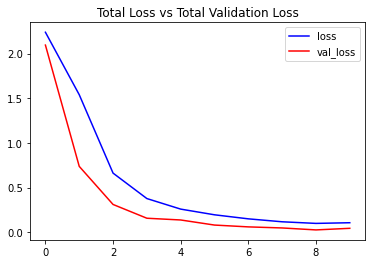

In [ ]:
plot_metric('loss', 'val_loss', 'Total Loss vs Total Validation Loss')

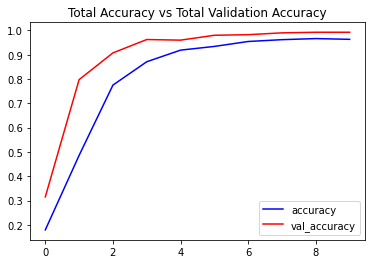

In [ ]:
plot_metric('accuracy', 'val_accuracy', 'Total Accuracy vs Total Validation Accuracy')


---



#**PREDICTION ----- USING -----  'MODEL_1(SGD)'**

---

In [ ]:
def make_average_predictions(video_file_path, predictions_frames_count):
    
    # Initializing the Numpy array which will store Prediction Probabilities
    predicted_labels_probabilities_np = np.zeros((predictions_frames_count, model_output_size), dtype = np.float)

    # Reading the Video File using the VideoCapture Object
    video_reader = cv2.VideoCapture(video_file_path)

    # Getting The Total Frames present in the video 
    video_frames_count = int(video_reader.get(cv2.CAP_PROP_FRAME_COUNT))

    # Calculating The Number of Frames to skip Before reading a frame
    skip_frames_window = video_frames_count // predictions_frames_count

    for frame_counter in range(predictions_frames_count): 

        # Setting Frame Position
        video_reader.set(cv2.CAP_PROP_POS_FRAMES, frame_counter * skip_frames_window)

        # Reading The Frame
        _ , frame = video_reader.read() 

        # Resize the Frame to fixed Dimensions
        resized_frame = cv2.resize(frame, (image_height, image_width))
        
        # Normalize the resized frame by dividing it with 255 so that each pixel value then lies between 0 and 1
        normalized_frame = resized_frame / 255

        # Passing the Image Normalized Frame to the model_1 and receiving Predicted Probabilities.
        predicted_labels_probabilities = model_1.predict(np.expand_dims(normalized_frame, axis = 0))[0]

        # Appending predicted label probabilities to the deque object
        predicted_labels_probabilities_np[frame_counter] = predicted_labels_probabilities

    # Calculating Average of Predicted Labels Probabilities Column Wise 
    predicted_labels_probabilities_averaged = predicted_labels_probabilities_np.mean(axis = 0)

    # Sorting the Averaged Predicted Labels Probabilities
    predicted_labels_probabilities_averaged_sorted_indexes = np.argsort(predicted_labels_probabilities_averaged)[::-1]

    # Iterating Over All Averaged Predicted Label Probabilities
    for predicted_label in predicted_labels_probabilities_averaged_sorted_indexes:

        # Accessing The Class Name using predicted label.
        predicted_class_name = classes_list[predicted_label]

        # Accessing The Averaged Probability using predicted label.
        predicted_probability = predicted_labels_probabilities_averaged[predicted_label]

        print(f"CLASS NAME: {predicted_class_name}   AVERAGED PROBABILITY: {(predicted_probability*100):.2}")
    
    # Closing the VideoCapture Object and releasing all resources held by it. 
    video_reader.release()

In [ ]:
from moviepy.editor import VideoFileClip
input_video_file_path = "/content/drive/MyDrive/dataset/test/When(days)/when(days)_8.mp4"

# Calling The Make Average Method To Start The Process
make_average_predictions(input_video_file_path, 50)

# Play Video File in the Notebook
VideoFileClip(input_video_file_path).ipython_display(width = 700)

Imageio: 'ffmpeg-linux64-v3.3.1' was not found on your computer; downloading it now.
Try 1. Download from https://github.com/imageio/imageio-binaries/raw/master/ffmpeg/ffmpeg-linux64-v3.3.1 (43.8 MB)
Downloading: 8192/45929032 bytes (0.0%)2007040/45929032 bytes (4.4%)4964352/45929032 bytes (10.8%)7897088/45929032 bytes (17.2%)11001856/45929032 bytes (24.0%)14057472/45929032 bytes (30.6%)17178624/45929032 bytes (37.4%)20373504/45929032 bytes (44.4%)23511040/45929032 bytes (51.2%)26656768/45929032 bytes (58.0%)29843456/45929032 bytes (65.0%)32866304/45929032 bytes (71.6%)36003840/45929032 bytes (78.4%)

 99%|█████████▊| 78/79 [00:02<00:00, 29.74it/s]



---



#**PREDICTION ----- USING -----  'Model(ADAM)'**

---

In [ ]:
def make_average_predictions_Model(video_file_path, predictions_frames_count):
    
    # Initializing the Numpy array which will store Prediction Probabilities
    predicted_labels_probabilities_np = np.zeros((predictions_frames_count, model_output_size), dtype = np.float)

    # Reading the Video File using the VideoCapture Object
    video_reader = cv2.VideoCapture(video_file_path)

    # Getting The Total Frames present in the video 
    video_frames_count = int(video_reader.get(cv2.CAP_PROP_FRAME_COUNT))

    # Calculating The Number of Frames to skip Before reading a frame
    skip_frames_window = video_frames_count // predictions_frames_count

    for frame_counter in range(predictions_frames_count): 

        # Setting Frame Position
        video_reader.set(cv2.CAP_PROP_POS_FRAMES, frame_counter * skip_frames_window)

        # Reading The Frame
        _ , frame = video_reader.read() 

        # Resize the Frame to fixed Dimensions
        resized_frame = cv2.resize(frame, (image_height, image_width))
        
        # Normalize the resized frame by dividing it with 255 so that each pixel value then lies between 0 and 1
        normalized_frame = resized_frame / 255

        # Passing the Image Normalized Frame to the Model and receiving Predicted Probabilities.
        predicted_labels_probabilities = Model.predict(np.expand_dims(normalized_frame, axis = 0))[0]

        # Appending predicted label probabilities to the deque object
        predicted_labels_probabilities_np[frame_counter] = predicted_labels_probabilities

    # Calculating Average of Predicted Labels Probabilities Column Wise 
    predicted_labels_probabilities_averaged = predicted_labels_probabilities_np.mean(axis = 0)

    # Sorting the Averaged Predicted Labels Probabilities
    predicted_labels_probabilities_averaged_sorted_indexes = np.argsort(predicted_labels_probabilities_averaged)[::-1]

    # Iterating Over All Averaged Predicted Label Probabilities
    for predicted_label in predicted_labels_probabilities_averaged_sorted_indexes:

        # Accessing The Class Name using predicted label.
        predicted_class_name = classes_list[predicted_label]

        # Accessing The Averaged Probability using predicted label.
        predicted_probability = predicted_labels_probabilities_averaged[predicted_label]

        print(f"CLASS NAME: {predicted_class_name}   AVERAGED PROBABILITY: {(predicted_probability*100):.2}")
    
    # Closing the VideoCapture Object and releasing all resources held by it. 
    video_reader.release()

In [ ]:
input_video_file_path = "/content/drive/MyDrive/dataset/test/How much/8477b0b9-6932-4cf0-b7d3-b5e881fc82b3-2.mp4"

# Calling The Make Average Method To Start The Process
make_average_predictions_Model(input_video_file_path, 50)

# Play Video File in the Notebook
VideoFileClip(input_video_file_path).ipython_display(width = 700)

CLASS NAME: How much   AVERAGED PROBABILITY: 8.2e+01
CLASS NAME: Which   AVERAGED PROBABILITY: 1.8e+01
CLASS NAME: When(days)   AVERAGED PROBABILITY: 0.0057
CLASS NAME: Why   AVERAGED PROBABILITY: 0.0012
CLASS NAME: Where   AVERAGED PROBABILITY: 0.00027
CLASS NAME: Who   AVERAGED PROBABILITY: 0.00027
CLASS NAME: How many   AVERAGED PROBABILITY: 7.7e-05
CLASS NAME: whose   AVERAGED PROBABILITY: 1.3e-06
CLASS NAME: When(time)   AVERAGED PROBABILITY: 5.2e-09
CLASS NAME: What   AVERAGED PROBABILITY: 4.9e-09


100%|██████████| 93/93 [00:01<00:00, 51.92it/s]




---



#**PREDICTION ----- USING -----  'model(RMSProp)'**

---



In [ ]:
def make_average_predictions_model(video_file_path, predictions_frames_count):
    
    # Initializing the Numpy array which will store Prediction Probabilities
    predicted_labels_probabilities_np = np.zeros((predictions_frames_count, model_output_size), dtype = np.float)

    # Reading the Video File using the VideoCapture Object
    video_reader = cv2.VideoCapture(video_file_path)

    # Getting The Total Frames present in the video 
    video_frames_count = int(video_reader.get(cv2.CAP_PROP_FRAME_COUNT))

    # Calculating The Number of Frames to skip Before reading a frame
    skip_frames_window = video_frames_count // predictions_frames_count

    for frame_counter in range(predictions_frames_count): 

        # Setting Frame Position
        video_reader.set(cv2.CAP_PROP_POS_FRAMES, frame_counter * skip_frames_window)

        # Reading The Frame
        _ , frame = video_reader.read() 

        # Resize the Frame to fixed Dimensions
        resized_frame = cv2.resize(frame, (image_height, image_width))
        
        # Normalize the resized frame by dividing it with 255 so that each pixel value then lies between 0 and 1
        normalized_frame = resized_frame / 255

        # Passing the Image Normalized Frame to the model and receiving Predicted Probabilities.
        predicted_labels_probabilities = model.predict(np.expand_dims(normalized_frame, axis = 0))[0]

        # Appending predicted label probabilities to the deque object
        predicted_labels_probabilities_np[frame_counter] = predicted_labels_probabilities

    # Calculating Average of Predicted Labels Probabilities Column Wise 
    predicted_labels_probabilities_averaged = predicted_labels_probabilities_np.mean(axis = 0)

    # Sorting the Averaged Predicted Labels Probabilities
    predicted_labels_probabilities_averaged_sorted_indexes = np.argsort(predicted_labels_probabilities_averaged)[::-1]

    # Iterating Over All Averaged Predicted Label Probabilities
    for predicted_label in predicted_labels_probabilities_averaged_sorted_indexes:

        # Accessing The Class Name using predicted label.
        predicted_class_name = classes_list[predicted_label]

        # Accessing The Averaged Probability using predicted label.
        predicted_probability = predicted_labels_probabilities_averaged[predicted_label]

        print(f"CLASS NAME: {predicted_class_name}   AVERAGED PROBABILITY: {(predicted_probability*100):.2}")
    
    # Closing the VideoCapture Object and releasing all resources held by it. 
    video_reader.release()

In [ ]:
input_video_file_path = "/content/drive/MyDrive/dataset/test/Where/where_2.mp4"

# Calling The Make Average Method To Start The Process
make_average_predictions_model(input_video_file_path, 50)

# Play Video File in the Notebook
VideoFileClip(input_video_file_path).ipython_display(width = 700)

CLASS NAME: Where   AVERAGED PROBABILITY: 1e+02
CLASS NAME: When(time)   AVERAGED PROBABILITY: 0.03
CLASS NAME: When(days)   AVERAGED PROBABILITY: 0.026
CLASS NAME: Which   AVERAGED PROBABILITY: 2e-05
CLASS NAME: whose   AVERAGED PROBABILITY: 2e-07
CLASS NAME: Who   AVERAGED PROBABILITY: 1.6e-14
CLASS NAME: How many   AVERAGED PROBABILITY: 5.2e-15
CLASS NAME: What   AVERAGED PROBABILITY: 8.8e-16
CLASS NAME: How much   AVERAGED PROBABILITY: 4.9e-16
CLASS NAME: Why   AVERAGED PROBABILITY: 1.5e-17


100%|██████████| 79/79 [00:02<00:00, 29.53it/s]


In [ ]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

<IPython.core.display.Javascript object>

Saved to photo.jpg


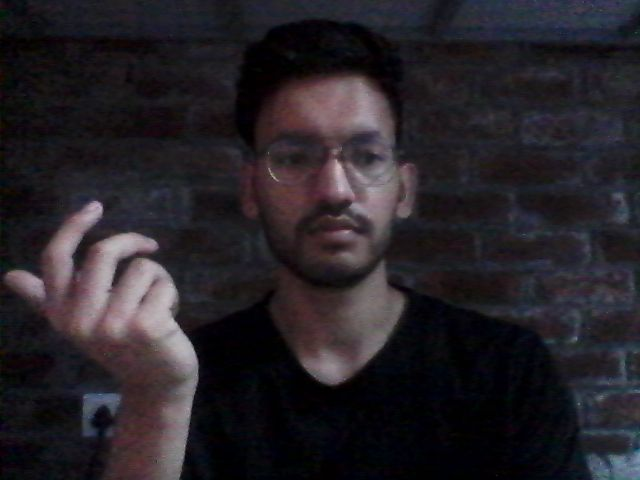

In [ ]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

In [ ]:
from IPython.display import display, Javascript,HTML
from google.colab.output import eval_js
from base64 import b64decode

def record_video(filename):
  js=Javascript("""
    async function recordVideo() {
      const options = { mimeType: "video/webm; codecs=vp9" };
      const div = document.createElement('div');
      const capture = document.createElement('button');
      const stopCapture = document.createElement("button");
      
      capture.textContent = "Start Recording";
      capture.style.background = "orange";
      capture.style.color = "white";

      stopCapture.textContent = "Stop Recording";
      stopCapture.style.background = "red";
      stopCapture.style.color = "white";
      div.appendChild(capture);

      const video = document.createElement('video');
      const recordingVid = document.createElement("video");
      video.style.display = 'block';

      const stream = await navigator.mediaDevices.getUserMedia({audio:true, video: true});
    
      let recorder = new MediaRecorder(stream, options);
      document.body.appendChild(div);
      div.appendChild(video);

      video.srcObject = stream;
      video.muted = true;

      await video.play();

      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      await new Promise((resolve) => {
        capture.onclick = resolve;
      });
      recorder.start();
      capture.replaceWith(stopCapture);

      await new Promise((resolve) => stopCapture.onclick = resolve);
      recorder.stop();
      let recData = await new Promise((resolve) => recorder.ondataavailable = resolve);
      let arrBuff = await recData.data.arrayBuffer();
      
      // stop the stream and remove the video element
      stream.getVideoTracks()[0].stop();
      div.remove();

      let binaryString = "";
      let bytes = new Uint8Array(arrBuff);
      bytes.forEach((byte) => {
        binaryString += String.fromCharCode(byte);
      })
    return btoa(binaryString);
    }
  """)
  try:
    display(js)
    data=eval_js('recordVideo({})')
    binary=b64decode(data)
    with open(filename,"wb") as video_file:
      video_file.write(binary)
    print(f"Finished recording video at:{filename}")
  except Exception as err:
    print(str(err))

In [ ]:
video_path = "test.mp4"
record_video(video_path)

<IPython.core.display.Javascript object>

Finished recording video at:test.mp4


In [ ]:
from IPython.display import HTML
from base64 import b64encode

def show_video(video_path, video_width = 600):
  
  video_file = open(video_path, "r+b").read()

  video_url = f"data:video/mp4;base64,{b64encode(video_file).decode()}"
  return HTML(f"""<video width={video_width} controls><source src="{video_url}"></video>""")

show_video(video_path)

In [ ]:
input_video_file_path = "/content/test.mp4"
VideoFileClip(input_video_file_path).ipython_display(width = 700)

OSError: ignored

In [ ]:
input_video_file_path = "/content/test.mp4"

# Calling The Make Average Method To Start The Process
make_average_predictions_model(input_video_file_path, 10)

# Play Video File in the Notebook
VideoFileClip(input_video_file_path).ipython_display(width = 700)

error: ignored